# ***Отчет для МинТранса***  




In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('/content/drive/MyDrive/archive/flights.csv', low_memory=False)



В базе данных задержки зависят от нескольких факторов: из-за воздушной системы, охранная, задержка со стороны авиакомпании, задержка из-за опаздания самолета, задержка ввиду погодных условий. Рассмотрим число задержек в каждом месяце отдельно:

2     8940
6     7501
1     6383
5     6259
12    5913
8     5823
7     5601
4     4978
3     4510
11    3456
9     3246
10    2106
Name: MONTH, dtype: int64


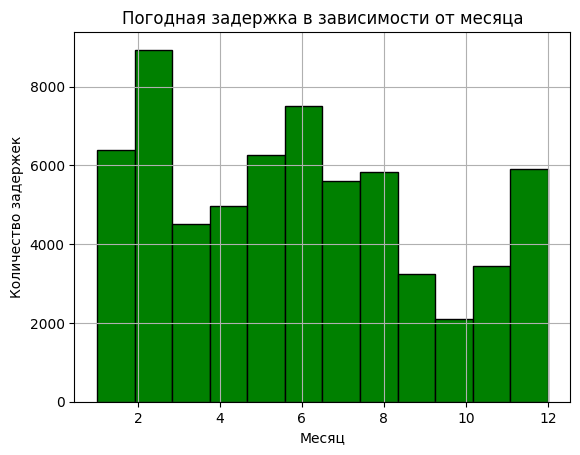

In [5]:
weather_delay = df[df['WEATHER_DELAY'] > 0]
print(weather_delay.MONTH.value_counts())

fig = plt.figure()
fig.patch.set_facecolor('xkcd:white')

weather_delay.MONTH.hist(bins=12, range=(1, 12), color='g', edgecolor='k')
plt.title('Погодная задержка в зависимости от месяца')
plt.xlabel('Месяц')
plt.ylabel('Количество задержек')
plt.show()


Нетрудно заметить, что задержки происходят чаще всего в феврале, июне и январе. Реже всего в октябре, сентябре и ноябре. Прежде чем сделать выводы о погодных задержках, проверим графики остальных задержек:

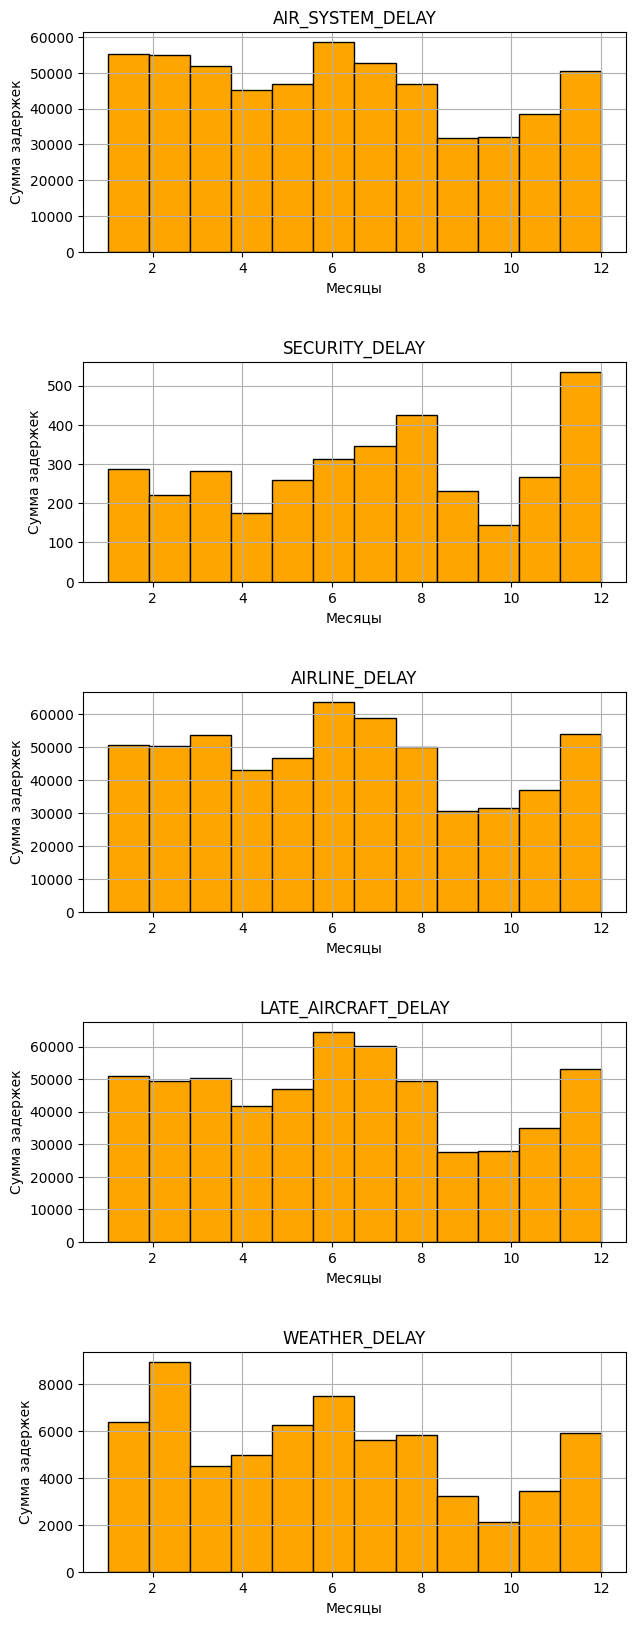

In [7]:
delay_type = ['AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY', 'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY']

fig = plt.figure(figsize=(7, 20))
fig.patch.set_facecolor('xkcd:white')

for k, i in enumerate(delay_type):
    plt.subplot(5, 1, k+1)
    delay = df[df[i] > 0]
    delay.MONTH.hist(bins=12, range=(1, 12), color='orange', edgecolor='k')
    plt.title(i)
    plt.xlabel('Месяцы')
    plt.ylabel('Сумма задержек')

plt.subplots_adjust(hspace=0.5)
plt.show()


Проведем 5 запросов.

**Запрос 1)** Количество задержек из-за погоды в феврале не зависит от работы аэропорта, а только от естественных природных процессов, таким образом феврале из-за сезонных муссонов бывает очень сильный ветер, поэтому так много задержек, произошедших по причине пагубных погодных условий.

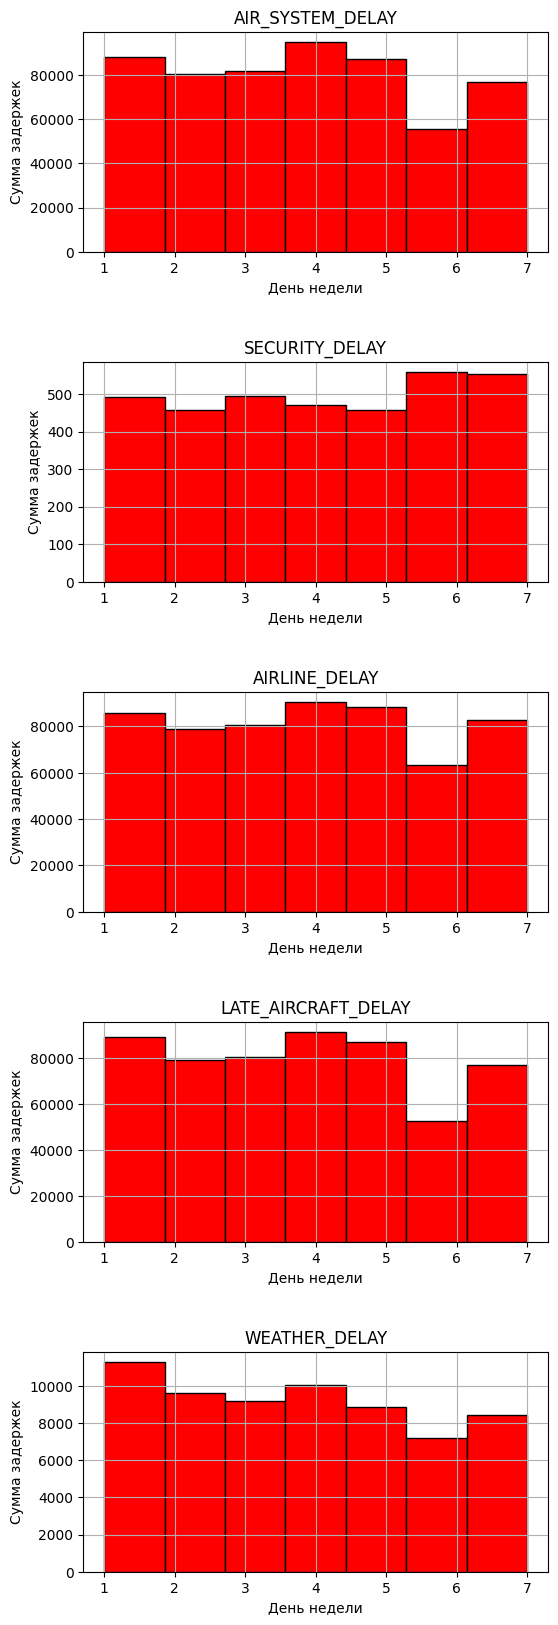

In [9]:
fig = plt.figure(figsize=(6, 20))
fig.patch.set_facecolor('xkcd:white')

for k, i in enumerate(delay_type):
    plt.subplot(5, 1, k+1)
    delay = df[df[i] > 0]
    delay.DAY_OF_WEEK.hist(bins=7, range=(1, 7), color='r', edgecolor='k')
    plt.title(i)
    plt.xlabel('День недели')
    plt.ylabel('Сумма задержек')

plt.subplots_adjust(hspace=0.5)
plt.show()


Можно сделать вывод, что задержки по причине охраны на выходных больше, чем в другие дни. Обратим внимание на общее количество рейсов по дням недели и еще посчитаем корреляцию задержек и количества полётов:

Вывод 2) Если сравнить с графиком задержек по причине охраны от дня недели явно увеличивается с количеством вылетов, об этом говорит и их положительный коэффециент корреляции. Поэтому можно сделать вывод, что по выходным и средам охрана создаёт задержки вылетов, т. е. не справляется с неравномерной нагрузкой на неделе.


4    872521
1    865543
5    862209
3    855897
2    844600
7    817764
6    700545
Name: DAY_OF_WEEK, dtype: int64


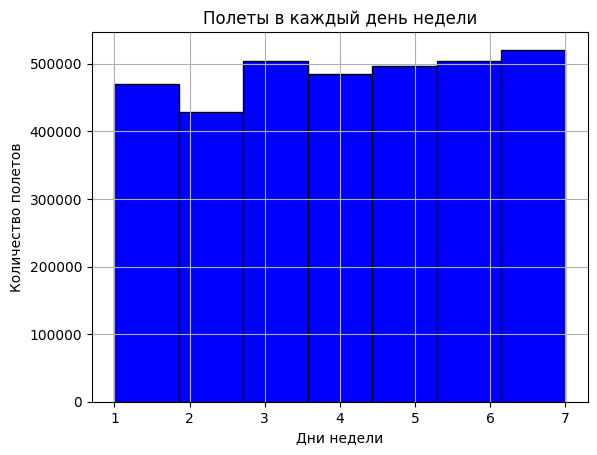

array([[1.        , 0.63626761],
       [0.63626761, 1.        ]])

In [11]:
print(df.DAY_OF_WEEK.value_counts())

fig = plt.figure()
fig.patch.set_facecolor('xkcd:white')

df.MONTH.hist(bins=7, range=(1, 7), color='b', edgecolor='k')
plt.title('Полеты в каждый день недели')
plt.xlabel('Дни недели')
plt.ylabel('Количество полетов')
plt.show()

security_delay = df[df['SECURITY_DELAY'] > 0]
np.corrcoef(np.array(df.DAY_OF_WEEK.value_counts()), np.array(security_delay.DAY_OF_WEEK.value_counts()))

**Вывод 3)** Построим круговую диаграмму. **Из** списка долей полётов каждой из авиакомпаний от общего числа полётов за июль, месяц в котором происходит пик задержек из-за авиакомпаний, получаем что авиакомпания WN создаёт больше всего задержек.

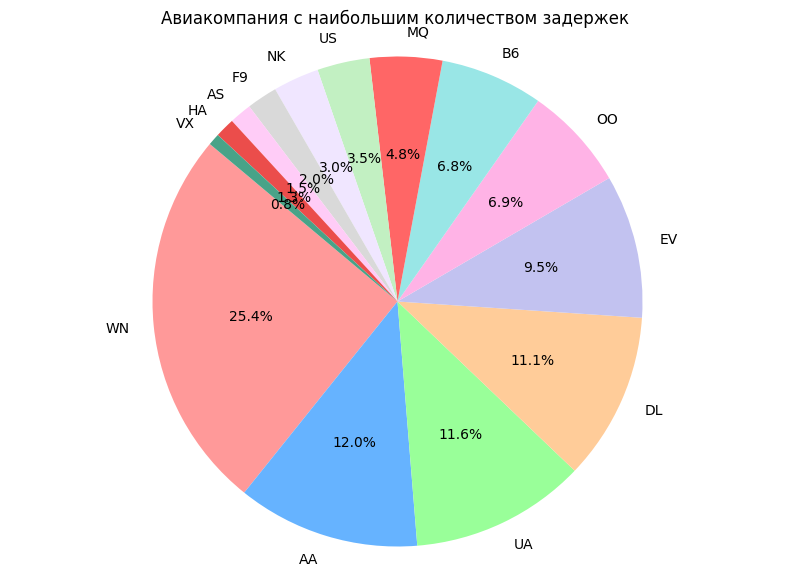

In [19]:
import matplotlib.pyplot as plt

labels = ['WN', 'AA', 'UA', 'DL', 'EV', 'OO', 'B6', 'MQ', 'US', 'NK', 'F9', 'AS', 'HA', 'VX']
sizes = [144524, 68656, 65999, 63128, 53943, 39127, 38665, 27236, 19717, 17307, 11517, 8363, 7395, 4445]
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99','#c2c2f0','#ffb3e6','#99e6e6','#ff6666','#c2f0c2','#f0e6ff','#d9d9d9','#ffccf7','#eb4d4b','#48a388']

plt.figure(figsize=(10, 7))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.axis('equal')

plt.title('Авиакомпания с наибольшим количеством задержек ')

plt.show()

**Вывод 4)** Количество задержек по типам авиакомпания, неисправность и опаздания самолёта коррелируют практически с коэфициентом 1, а значит решив проблему с учащением задержк от авиакомпаний, решатся и проблемы задержек по причине опазадний и аэро-систем.


In [15]:
late_aircraft_delay = df[df['LATE_AIRCRAFT_DELAY'] > 0]
airline_delay = df[df['AIRLINE_DELAY'] > 0]
airsystem_delay = df[df['AIR_SYSTEM_DELAY'] > 0]
print(np.corrcoef(np.array(late_aircraft_delay.DAY_OF_WEEK.value_counts()), np.array(airsystem_delay.DAY_OF_WEEK.value_counts())))
print(np.corrcoef(np.array(late_aircraft_delay.DAY_OF_WEEK.value_counts()), np.array(airline_delay.DAY_OF_WEEK.value_counts())))
print(np.corrcoef(np.array(airline_delay.DAY_OF_WEEK.value_counts()), np.array(airsystem_delay.DAY_OF_WEEK.value_counts())))

[[1.         0.99251248]
 [0.99251248 1.        ]]
[[1.         0.99734813]
 [0.99734813 1.        ]]
[[1.         0.99570908]
 [0.99570908 1.        ]]


**Вывод 5)** Рассчитаем среднюю задержки для каждой группы:

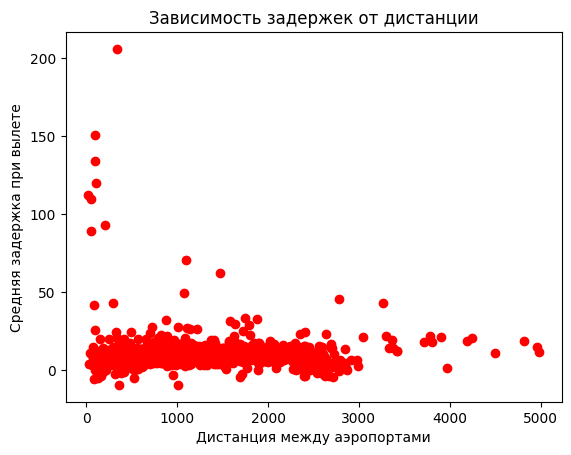

In [24]:
distance_groups = df.groupby('DISTANCE')

average_delay_by_distance = distance_groups['DEPARTURE_DELAY'].mean()

plt.scatter(average_delay_by_distance.index, average_delay_by_distance.values, color='r' )
plt.xlabel('Дистанция между аэропортами')
plt.ylabel('Средняя задержка при вылете')
plt.title('Зависимость задержек от дистанции')
plt.show()